In [1]:
import pandas as pd
import numpy as np
from keras.datasets import boston_housing
from keras  import layers, models, optimizers

In [14]:
(train_data , train_targets) ,(test_data,test_targets) = boston_housing.load_data()

In [15]:
train_data.shape

(404, 13)

In [16]:
mean = train_data.mean(axis=0)
train_data = train_data  - mean
std = train_data.std(axis=0)
train_data = train_data / std

test_data = test_data - mean
test_data = test_data / std

In [17]:
def build_model_regression(input_data):
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(input_data,)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
    return model

In [18]:
k = 4
num_val_samples = len(train_data) // 4
num_epoch = 80
all_history = []

In [19]:
for i in range(k):
    print("Fold " , i)
    val_data = train_data[i*num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
     train_data[(i+1) * num_val_samples:]],
     axis= 0   
    )
    
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
     train_targets[(i+1) * num_val_samples:]],
     axis= 0   
    )    
    model = build_model_regression(13)
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epoch, batch_size =16, 
                        validation_data = (val_data, val_targets),
                        verbose=0)
    all_history.append(history.history['val_mae'])
    

Fold  0


d:\david\learning_platzi\machine_learning\redes_neuronales\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold  1
Fold  2
Fold  3


In [20]:
all_mae_avg = pd.DataFrame(all_history).mean(axis=0)

In [21]:
all_mae_avg

0     19.499000
1     16.049427
2     11.789634
3      7.920824
4      5.909534
        ...    
75     2.349695
76     2.388081
77     2.427678
78     2.387929
79     2.407048
Length: 80, dtype: float64

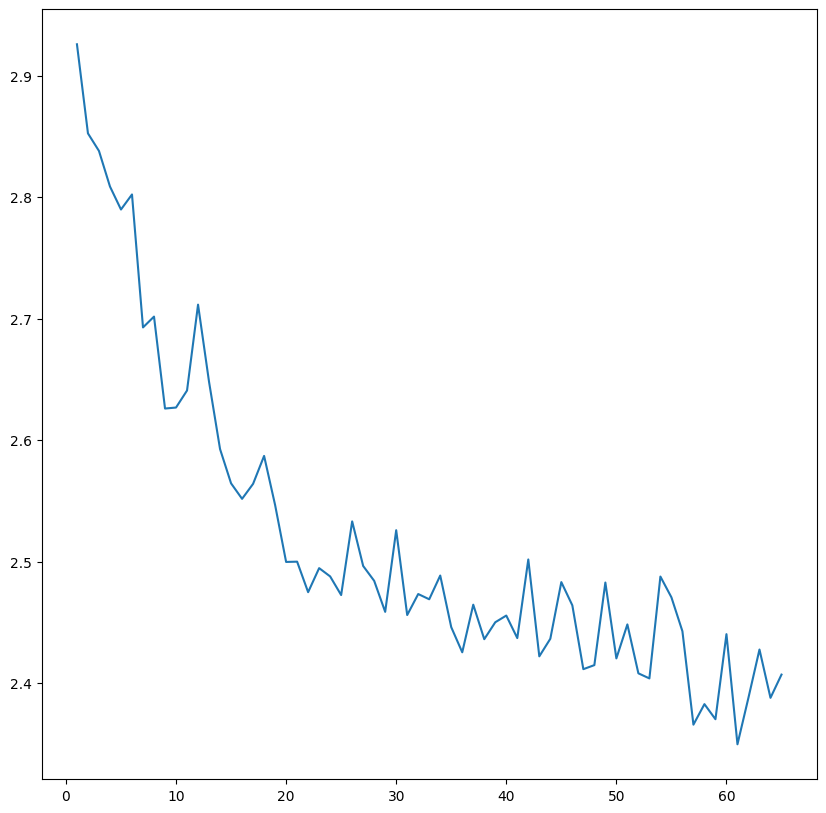

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
plt.plot(range(1,len(all_mae_avg[15:])+1), all_mae_avg[15:])
plt.show()

In [23]:
model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.5857 - mae: 3.0568 


[22.585674285888672, 3.0567924976348877]